<a href="https://colab.research.google.com/github/BISH0808/JavaScript_basics/blob/main/Notes_from_UlbiTV_video/UseRef_Dom_element_Uncontrol_component.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# хук useRef. Доступ к DOM элементу. Неуправляемый компонент

* В предыщем [My Notebook](https://colab.research.google.com/drive/1icmNg39s3qYyv2TinLEfqxhVsOBDgYOB#scrollTo=Kho01NXWlSmU)      мы начились получать данные из управляемого Inputa. В этом Notebook мы научимся получать данные из неуправляемого Inputa. Для этого можно воспользоваться новым хуком, который называется **useRef**. C помощью этого хука мы можем получить доступ к DOM элементу, и уже этого DOM элемента забрать value.

* Ниже показано, как использовать хук **useRef**.

* Ниже Вы вывидите как поменялось **App.js** по сравнению с [Notebook](https://colab.research.google.com/drive/1icmNg39s3qYyv2TinLEfqxhVsOBDgYOB#scrollTo=8xRPGuSUoNb_) :

In [ ]:
import React, {useState} from 'react';
import Counter from './components/Counter';
import ClassCounter from './components/ClassCounter';
import './styles/App.css'
import PostItem from './components/PostItem';
import Postlist from './components/Postlist';
import Mybutton from './components/UI/button/Mybutton';
import Myinput from './components/UI/input/Myinput';
import { useRef } from 'react';

function App() {
        const [posts, setPosts] = useState([
          {id: 1, title: 'Javasript', body: 'Description'},
          {id: 2, title: 'Javasript 2', body: 'Description'},
          {id: 3, title: 'Javasript 3', body: 'Description'},
          {id: 4, title: 'Javasript 4', body: 'Description'}
        ])

  const [title, setTitle]  = useState('Hi!')
  const bodyInputRef=useRef();
  const addNewPost = (e) => {
    // Предотвращаем обновление страницы при submit формы
    e.preventDefault()
    console.log(title)
    console.log(bodyInputRef.current.value)
  }


  return (
    <div className="App">
       <form>
        {/* Управляемый компонент */}
        <Myinput
          value={title}
          onChange={e => setTitle(e.target.value)}
          type="text"
          placeholder="Название поста"
        />
        <input ref={bodyInputRef} type="text"/>
        <Mybutton onClick={addNewPost}>Создать пост</Mybutton>
      </form>
      <Postlist posts={posts} title="Посты про JS"/>


    </div>
  );
}

export default App;


* Теперь при вводе в Input значения, мы будем видеть его в консоли:

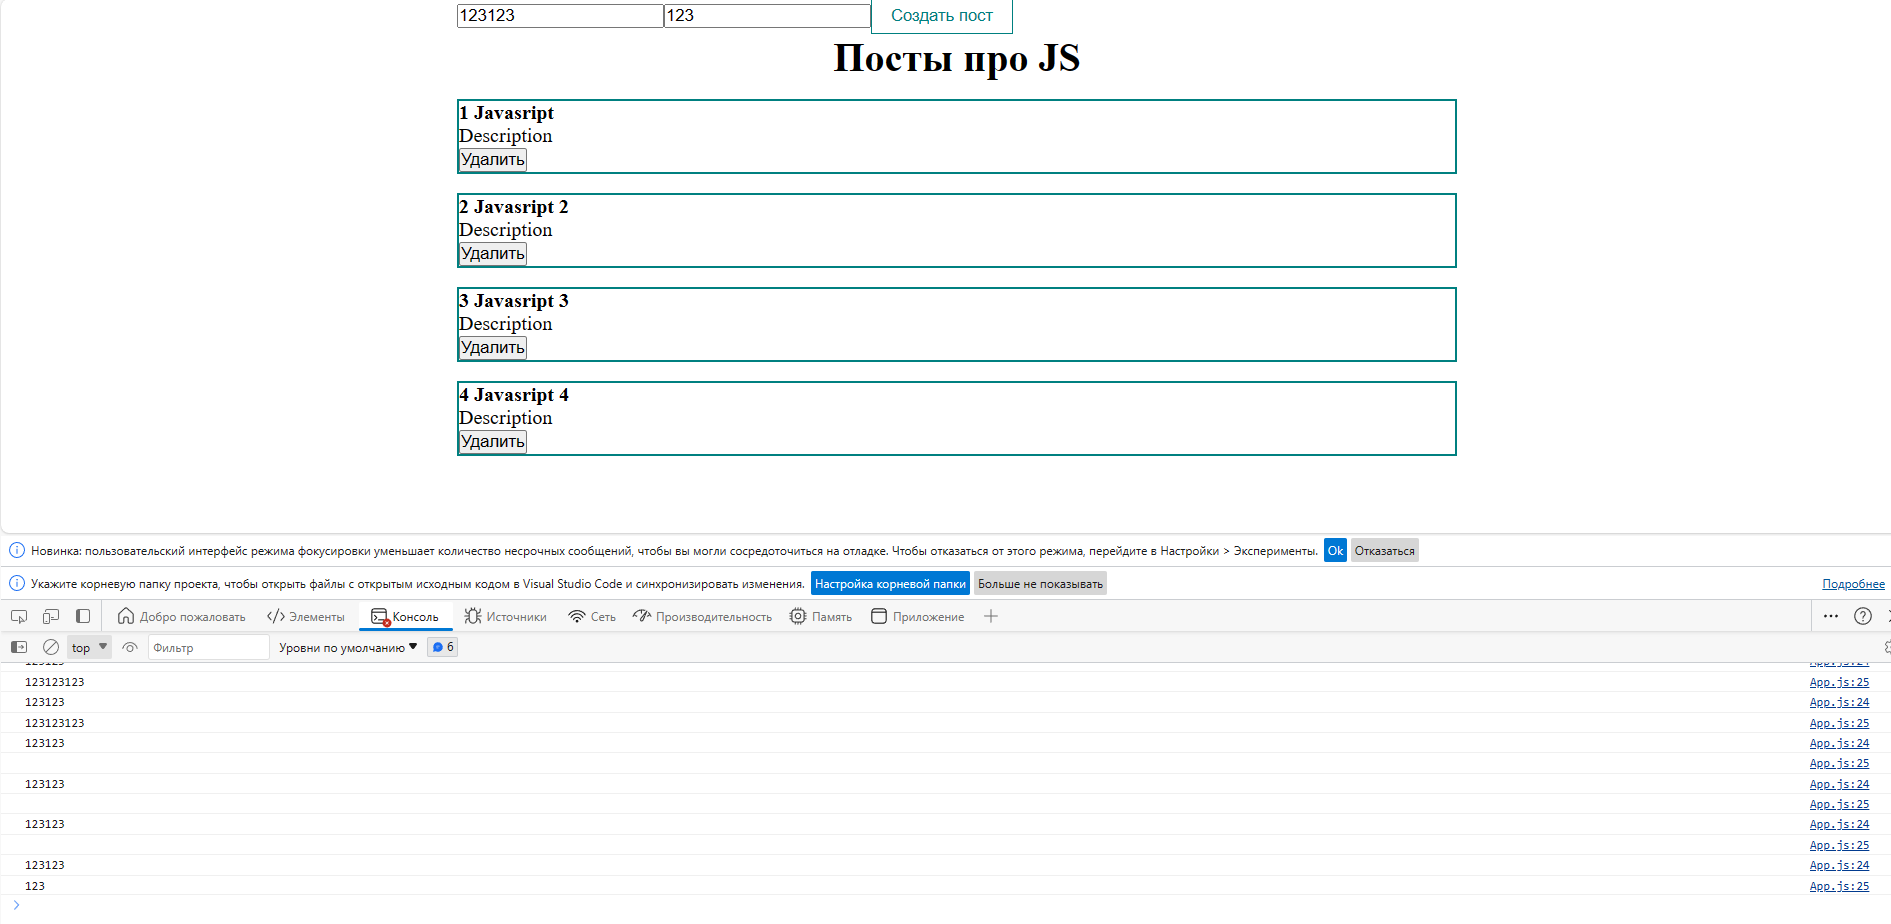

* Теперь научимся передавать ссылку в наш собственный компонент. Для этого обернем целиком весь компонент **Myinput** в функцию **forwardRef**.

In [ ]:
import React from 'react'
import classes from './MyInput.module.css'
const Myinput = React.forwardRef((props, ref) => {
  return (
    <input ref={ref} className={classes.Myinput} {...props}/>
  );
});

export default Myinput


* Теперь App.js будет выглядет вот так:

In [ ]:
import React, {useState} from 'react';
import Counter from './components/Counter';
import ClassCounter from './components/ClassCounter';
import './styles/App.css'
import PostItem from './components/PostItem';
import Postlist from './components/Postlist';
import Mybutton from './components/UI/button/Mybutton';
import Myinput from './components/UI/input/Myinput';
import { useRef } from 'react';

function App() {
        const [posts, setPosts] = useState([
          {id: 1, title: 'Javasript', body: 'Description'},
          {id: 2, title: 'Javasript 2', body: 'Description'},
          {id: 3, title: 'Javasript 3', body: 'Description'},
          {id: 4, title: 'Javasript 4', body: 'Description'}
        ])

  const [title, setTitle]  = useState('Hi!')
  const bodyInputRef=useRef();
  const addNewPost = (e) => {
    // Предотвращаем обновление страницы при submit формы
    e.preventDefault()
    console.log(title)
    console.log(bodyInputRef.current.value)
  }


  return (
    <div className="App">
       <form>
        {/* Управляемый компонент */}
        <Myinput
          value={title}
          onChange={e => setTitle(e.target.value)}
          type="text"
          placeholder="Название поста"
        />
{/* Неконтролируемый или неупарвляемый компонент */}
        <Myinput
          ref={bodyInputRef}
          type="text"
          placeholder="Описание поста"
        />
        <Mybutton onClick={addNewPost}>Создать пост</Mybutton>
      </form>
      <Postlist posts={posts} title="Посты про JS"/>


    </div>
  );
}

export default App;


* На странице увидим следующее:

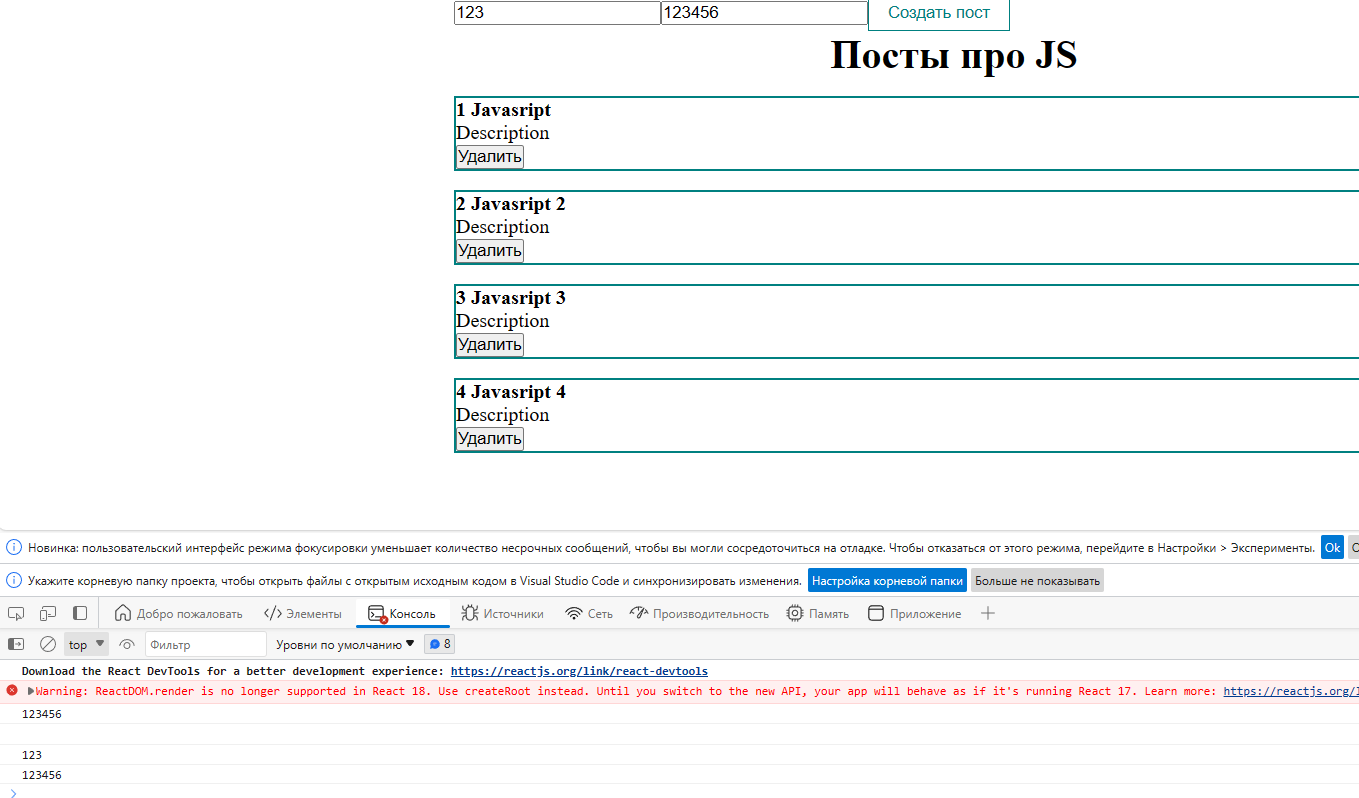

* В примере сверху компонет **Myinput** неуправляемый.

* Попробуем теперь сделать этот компонент управляемым.

* Для этого так изменим так **App.js**:

In [ ]:
import React, {useState} from 'react';
import Counter from './components/Counter';
import ClassCounter from './components/ClassCounter';
import './styles/App.css'
import PostItem from './components/PostItem';
import Postlist from './components/Postlist';
import Mybutton from './components/UI/button/Mybutton';
import Myinput from './components/UI/input/Myinput';
import { useRef } from 'react';

function App() {
        const [posts, setPosts] = useState([
          {id: 1, title: 'Javasript', body: 'Description'},
          {id: 2, title: 'Javasript 2', body: 'Description'},
          {id: 3, title: 'Javasript 3', body: 'Description'},
          {id: 4, title: 'Javasript 4', body: 'Description'}
        ])

  const [title, setTitle]  = useState('')
  const [body, setBody]  = useState('')
  const addNewPost = (e) => {
      e.preventDefault()
      const newPost ={
        title,
        body
      }
      console.log(newPost)
  }


  return (
    <div className="App">
       <form>
        {/* Управляемый компонент */}
        <Myinput
          value={title}
          onChange={e => setTitle(e.target.value)}
          type="text"
          placeholder="Название поста"
        />
{/* Неконтролируемый или неупарвляемый компонент */}
        <Myinput
          value={body}
          onChange={e => setBody(e.target.value)}
          type="text"
          placeholder="Описание поста"
        />
        <Mybutton onClick={addNewPost}>Создать пост</Mybutton>
      </form>
      <Postlist posts={posts} title="Посты про JS"/>


    </div>
  );
}

export default App;


* теперь при вводе текста в **Input** будем получасть следующее в console.log:

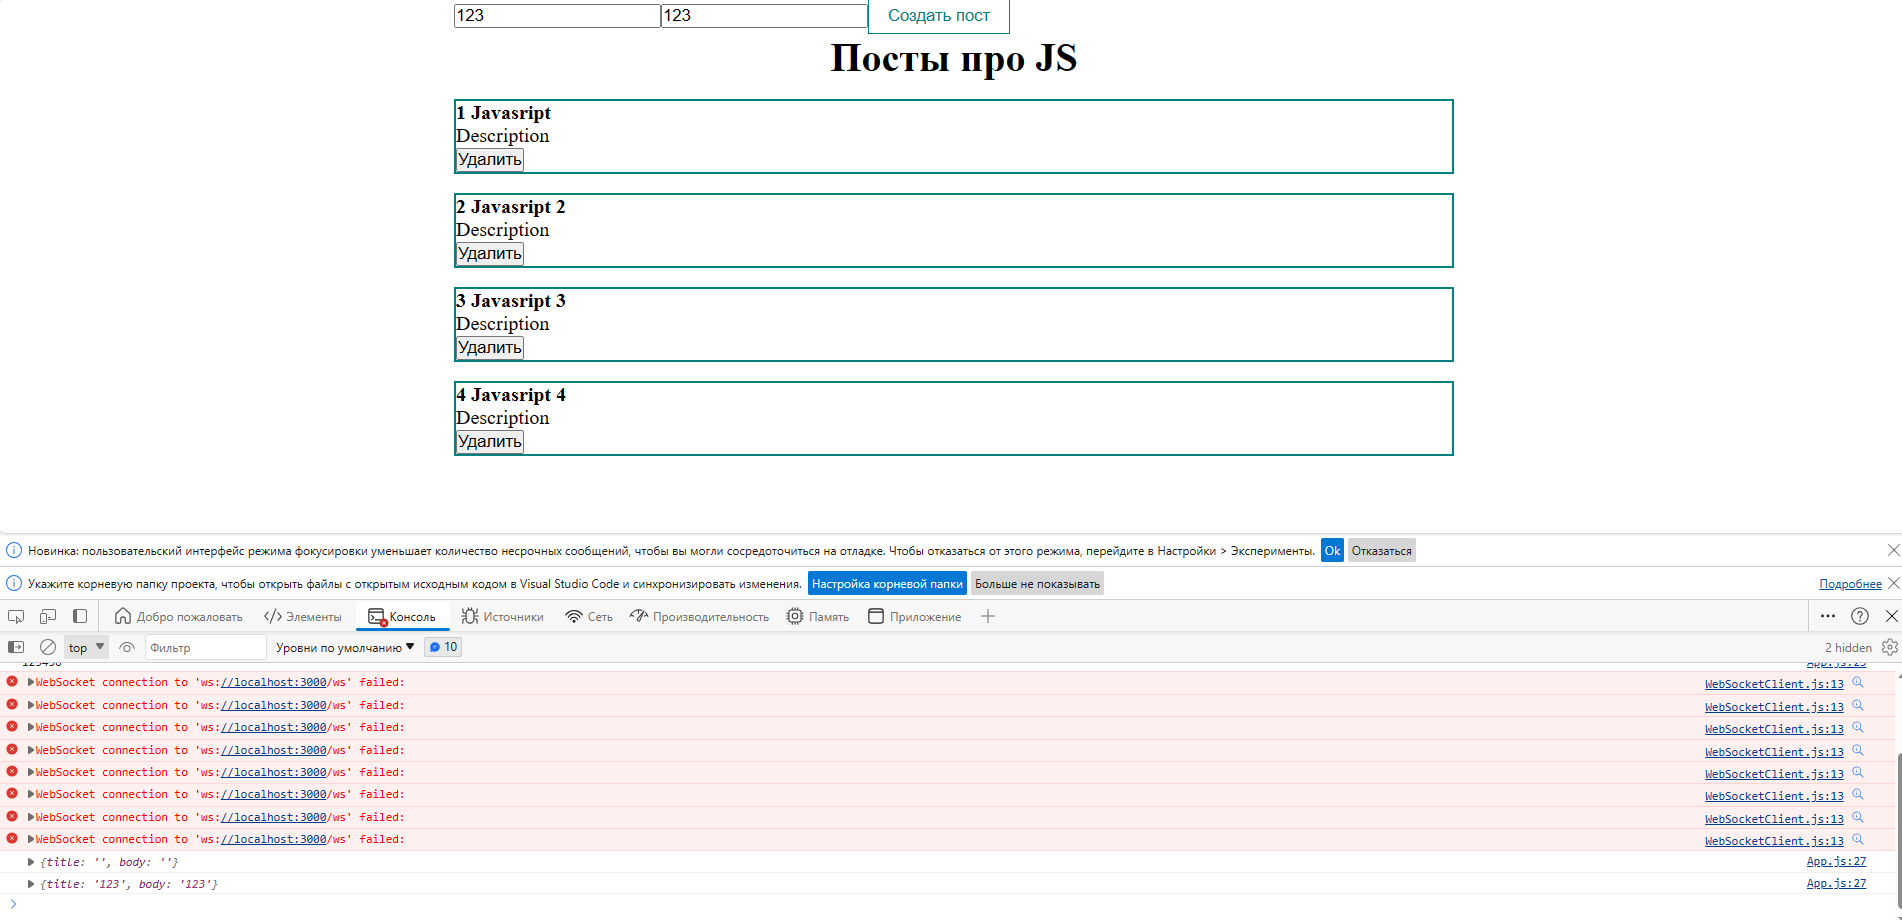

* Остается добавить **id**. **ID** должен быть всегда уникальный и его получим из текущей даты.

In [ ]:
id: Date.now(),

* Также остается созданный объект добавить в массив постов. Мы не изменяем состояние напрямую, мы вызываем функцию **SetPosts** и передаем туда новый массив, куда разворачиваем старый массив с уже существующими постами и в конец добавляем новый пост. (**ОЧЕНЬ ВАЖНАЯ КОНЦЕПЦИЯ, КОТОРУЮ НЕОБХОДИМО ЗАПОМНИТЬ**)

In [ ]:
      setPosts([...posts, newPost])

* Теперь **App.js** выглядит так:

In [ ]:
import React, {useState} from 'react';
import Counter from './components/Counter';
import ClassCounter from './components/ClassCounter';
import './styles/App.css'
import PostItem from './components/PostItem';
import Postlist from './components/Postlist';
import Mybutton from './components/UI/button/Mybutton';
import Myinput from './components/UI/input/Myinput';
import { useRef } from 'react';

function App() {
        const [posts, setPosts] = useState([
          {id: 1, title: 'Javasript', body: 'Description'},
          {id: 2, title: 'Javasript 2', body: 'Description'},
          {id: 3, title: 'Javasript 3', body: 'Description'},
          {id: 4, title: 'Javasript 4', body: 'Description'}
        ])

  const [title, setTitle]  = useState('')
  const [body, setBody]  = useState('')
  const addNewPost = (e) => {
      e.preventDefault()
      const newPost ={
        id: Date.now(),
        title,
        body
      }
      setPosts([...posts, newPost])
  }


  return (
    <div className="App">
       <form>
        {/* Управляемый компонент */}
        <Myinput
          value={title}
          onChange={e => setTitle(e.target.value)}
          type="text"
          placeholder="Название поста"
        />
{/* Неконтролируемый или неупарвляемый компонент */}
        <Myinput
          value={body}
          onChange={e => setBody(e.target.value)}
          type="text"
          placeholder="Описание поста"
        />
        <Mybutton onClick={addNewPost}>Создать пост</Mybutton>
      </form>
      <Postlist posts={posts} title="Посты про JS"/>


    </div>
  );
}

export default App;


* И можно создавать посты на странице. Они будут выглядет вот так:

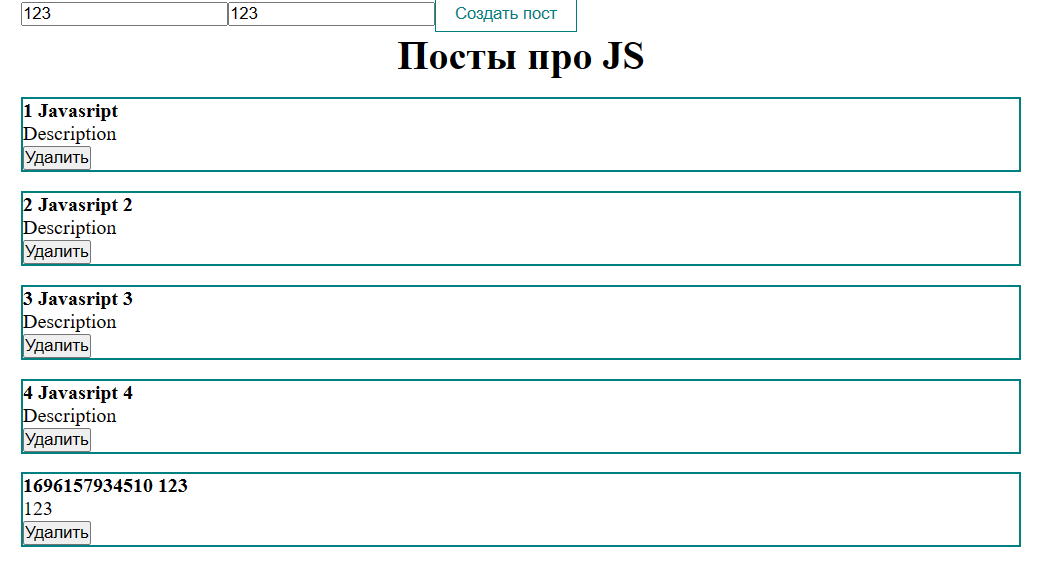

* Добавим в **PostItem** также номер элемента массива. Для этого в **Postlist.jsx** изменим:

In [ ]:
import React from 'react'
import PostItem from './PostItem'

const Postlist = ({posts, title}) => {
  return (
    <div>
    <h1 style={{textAlign: 'center'}}>
        {title}
      </h1>
      {posts.map((post, index) =>
        <PostItem number={index + 1} post={post} key={post.id}/>
      )}
    </div>
  )
}

export default Postlist


* В **PostItem.jsx** вместо id будем выводить number:

In [ ]:
import React from 'react'

function PostItem(props) {

  return (
    <div className = "post">
        <div className = "post__content">
          <strong>  {props.number} {props.post.title} </strong>
          <div>
            {props.post.body}
          </div>
          <div className="post__btns">
            <button>Удалить</button>
          </div>
        </div>
      </div>

  )
}

export default PostItem


* В итоге получаем следующее на страницу:

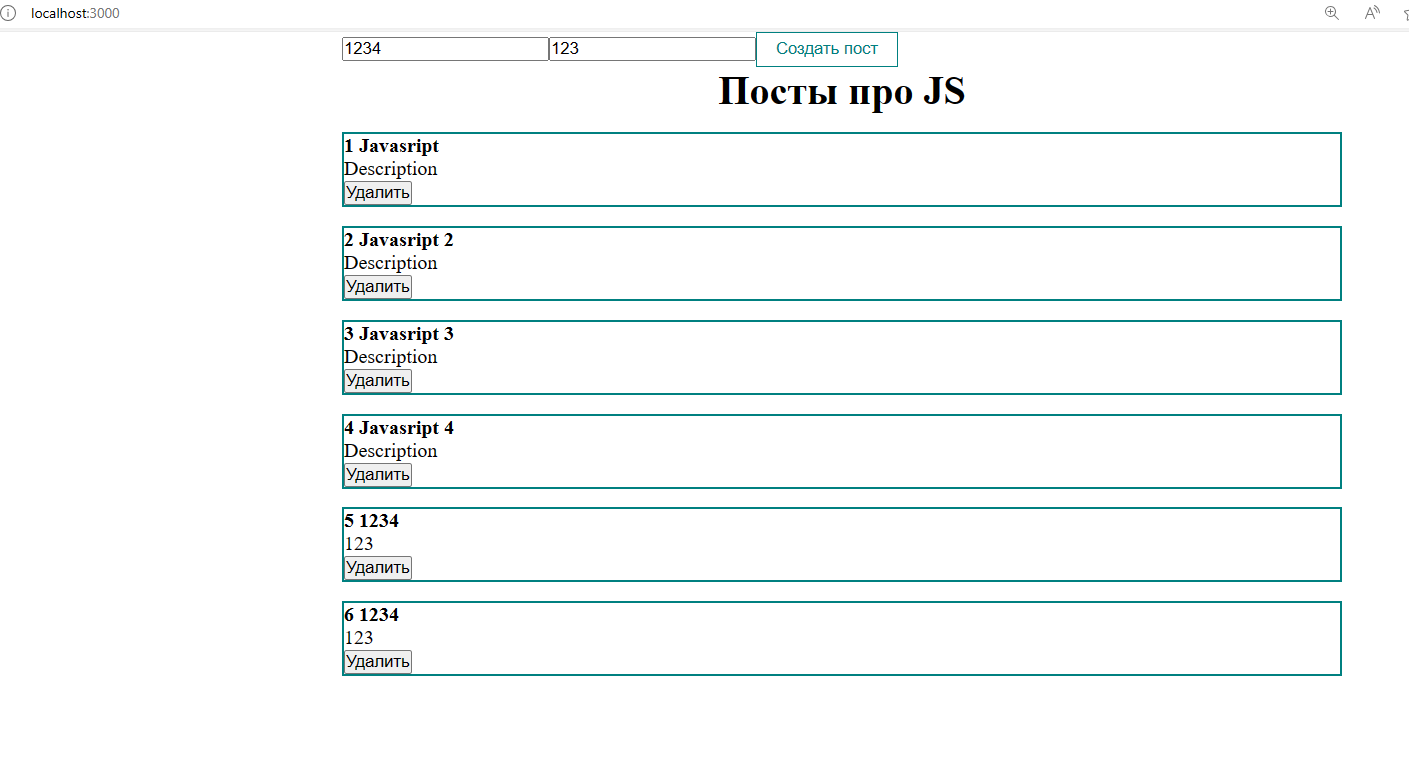

* Для того чтобы очищался компонент Input в App.jsx необходимо прописать:

In [ ]:
      setTitle('')
      setBody('')

* То есть, просто обнуляем состояние. Теперь App.jsx будет выглядеть вот так:

In [ ]:
import React, {useState} from 'react';
import Counter from './components/Counter';
import ClassCounter from './components/ClassCounter';
import './styles/App.css'
import PostItem from './components/PostItem';
import Postlist from './components/Postlist';
import Mybutton from './components/UI/button/Mybutton';
import Myinput from './components/UI/input/Myinput';
import { useRef } from 'react';

function App() {
        const [posts, setPosts] = useState([
          {id: 1, title: 'Javasript', body: 'Description'},
          {id: 2, title: 'Javasript 2', body: 'Description'},
          {id: 3, title: 'Jaфvasript 3', body: 'Description'},
          {id: 4, title: 'Javasript 4', body: 'Description'}
        ])

  const [title, setTitle]  = useState('')
  const [body, setBody]  = useState('')
  const addNewPost = (e) => {
      e.preventDefault()
      const newPost ={
        id: Date.now(),
        title,
        body
      }
      setPosts([...posts, newPost])
      setTitle('')
      setBody('')
  }


  return (
    <div className="App">
       <form>
        {/* Управляемый компонент */}
        <Myinput
          value={title}
          onChange={e => setTitle(e.target.value)}
          type="text"
          placeholder="Название поста"
        />
{/* Неконтролируемый или неупарвляемый компонент */}
        <Myinput
          value={body}
          onChange={e => setBody(e.target.value)}
          type="text"
          placeholder="Описание поста"
        />
        <Mybutton onClick={addNewPost}>Создать пост</Mybutton>
      </form>
      <Postlist posts={posts} title="Посты про JS"/>


    </div>
  );
}

export default App;


* Теперь **Input** очищается:

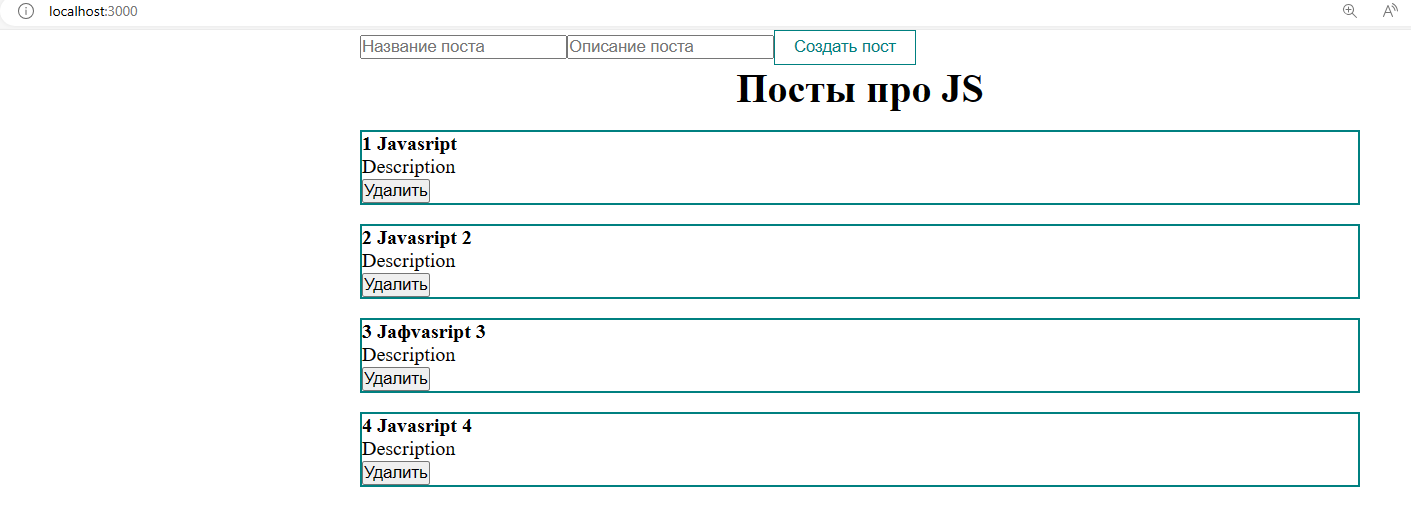